In [ ]:
#Importing  required libraries :
import pandas as pd 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("popular")
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzippi

In [ ]:
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
Data=Data.drop(columns=['id'])


In [ ]:
Data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
feature=Data.iloc[:,1].values
labels=Data.iloc[:,0].values

In [ ]:
#Printing the shape and the details of the columns in the dataframe.
shape= Data.shape
print(shape)
columns=Data.columns
print(columns)

(31962, 2)
Index(['label', 'tweet'], dtype='object')


In [ ]:
Data.drop_duplicates()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...


In [ ]:
#Information about the Dataframe
Data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [ ]:
#To display the count of positive and negative tweets.
count=Data.label.value_counts()
count

0    29720
1     2242
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


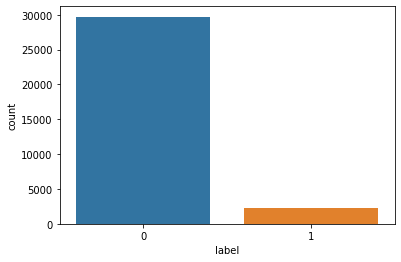

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=Data)

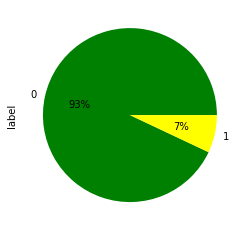

In [ ]:
#Representing the count of positive and negative tweets using a pie chart
count.plot(kind='pie',autopct='%1.0f%%',colors=["green","yellow"])

In [ ]:
Data.isnull().sum()

label    0
tweet    0
dtype: int64

#Data-Cleaning


###Capitalization/ Lower case

In [ ]:
# Converting to lower case
Data["text_clean"] = Data["tweet"].apply(lambda x: x.lower())
display(Data.head())

,label,tweet,text_clean
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


### Remove Twitter Handels

In [ ]:
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
    return text

In [ ]:
import numpy as np
import re

Data['text_clean'] = np.vectorize(remove_pattern)(Data['text_clean'], "@[\w]*") 

In [ ]:
Data.head(10)

,label,tweet,text_clean,tokenized,stopwords_removed,porter_stemmer,combined_postag
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[[(father, RBR), (dysfunctional, JJ), (selfish..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they do...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[[(thanks, NNS), (lyft, VBP), (credit, NN), (c..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[[(bihday, NN), (majesty, NN)]]"
3,0,#model i love u take with u all the time in ...,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]","[[(model, NN), (love, VB), (take, NN), (time, ..."
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[[(factsguide, RB), (society, NN), (motivation..."
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they lea...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...","[huge, fan, fare, big, talk, leav, chao, pay, ...","[[(huge, JJ), (fan, NN), (fare, NN), (big, JJ)..."
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]","[camp, tomorrow, danni]","[[(camping, VBG), (tomorrow, NN), (danny, NN)]]"
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, cant, think,...","[next, school, year, year, exam, cant, think, ...","[[(next, JJ), (school, NN), (year, NN), (year,..."
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...","[love, land, allin, cav, champion, cleveland, ...","[[(love, NN), (land, NN), (allin, NN), (cavs, ..."
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr,"[welcome, here, im, its, so, gr]","[welcome, im, gr]","[welcom, im, gr]","[[(welcome, JJ), (im, NN), (gr, NN)]]"


### Noise Removal


In [ ]:
def remove_unecessary_characters(text):
     feature_processed = re.sub(r"https?://\S+|www\.\S+", "", text)      #Remove URLs 
     html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
     feature_processed = re.sub(html, "", feature_processed)            #Remove the html
     feature_processed = re.sub(r'[^\x00-\x7f]',r'', feature_processed) #Remove non-ASCII characters 
     feature_processed = feature_processed.translate(str.maketrans('', '', string.punctuation)) #Remove the punctuation
     #Remove Operators and Expressions
     feature_processed =re.sub('[!@#$:).;,?&[/'']', '',   feature_processed )
     # Remove spaces
     feature_processed = re.sub('  ', ' ',   feature_processed )
     # Remove single quotes
     feature_processed  =   feature_processed .replace('\'','',)
   
     feature_processed  =   feature_processed .replace(',','',)
     #Remove special characters
     feature_processed = re.sub('[^(A-Z,a-z,0-9)]',' ',  feature_processed )
     # Remove all the single characters
     feature_processed = re.sub(r'\s+[a-zA-Z]\s+', ' ',  feature_processed )
     # Substitute multiple spaces with a single space
     feature_processed  = re.sub(r'\s+', ' ',  feature_processed , flags=re.I)  
     feature_processed = feature_processed.replace("'", "")
     feature_processed = re.sub(r"\d", "", feature_processed) #remove digits
     return feature_processed

In [ ]:
import re
import string
Data["text_clean"] = Data["text_clean"].apply(lambda x: remove_unecessary_characters(x))

In [ ]:
Data.head(10)

,label,tweet,text_clean,tokenized,stopwords_removed,porter_stemmer,combined_postag
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[[(father, RBR), (dysfunctional, JJ), (selfish..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they do...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[[(thanks, NNS), (lyft, VBP), (credit, NN), (c..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[[(bihday, NN), (majesty, NN)]]"
3,0,#model i love u take with u all the time in ...,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]","[[(model, NN), (love, VB), (take, NN), (time, ..."
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[[(factsguide, RB), (society, NN), (motivation..."
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they lea...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...","[huge, fan, fare, big, talk, leav, chao, pay, ...","[[(huge, JJ), (fan, NN), (fare, NN), (big, JJ)..."
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]","[camp, tomorrow, danni]","[[(camping, VBG), (tomorrow, NN), (danny, NN)]]"
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, cant, think,...","[next, school, year, year, exam, cant, think, ...","[[(next, JJ), (school, NN), (year, NN), (year,..."
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...","[love, land, allin, cav, champion, cleveland, ...","[[(love, NN), (land, NN), (allin, NN), (cavs, ..."
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr,"[welcome, here, im, its, so, gr]","[welcome, im, gr]","[welcom, im, gr]","[[(welcome, JJ), (im, NN), (gr, NN)]]"


#Text Preprocessing

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

Data['tokenized'] = Data['text_clean'].apply(word_tokenize)
Data['tokenized'].head()


0    [when, father, is, dysfunctional, and, is, so,...
1    [thanks, for, lyft, credit, cant, use, cause, ...
2                              [bihday, your, majesty]
3    [model, love, take, with, all, the, time, in, ur]
4               [factsguide, society, now, motivation]
Name: tokenized, dtype: object

In [ ]:
stop = set(stopwords.words('english'))
Data['stopwords_removed'] = Data['tokenized'].apply(lambda x: [word for word in x if word not in stop])
Data.head()

,label,tweet,text_clean,tokenized,stopwords_removed,porter_stemmer,combined_postag
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[[(father, RBR), (dysfunctional, JJ), (selfish..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they do...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[[(thanks, NNS), (lyft, VBP), (credit, NN), (c..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[[(bihday, NN), (majesty, NN)]]"
3,0,#model i love u take with u all the time in ...,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]","[[(model, NN), (love, VB), (take, NN), (time, ..."
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[[(factsguide, RB), (society, NN), (motivation..."


### Stemming

In [ ]:
def porter_stemmer(text):
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

Data['porter_stemmer'] = Data['stopwords_removed'].apply(lambda x: porter_stemmer(x))
Data.head()

,label,tweet,text_clean,tokenized,stopwords_removed,porter_stemmer,combined_postag
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[[(father, RBR), (dysfunctional, JJ), (selfish..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they do...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[[(thanks, NNS), (lyft, VBP), (credit, NN), (c..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[[(bihday, NN), (majesty, NN)]]"
3,0,#model i love u take with u all the time in ...,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]","[[(model, NN), (love, VB), (take, NN), (time, ..."
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[[(factsguide, RB), (society, NN), (motivation..."


### POS Tagging

In [ ]:
def pos_tag(text): 
    pos_tagged_text = [nltk.pos_tag(text)]
    return pos_tagged_text

In [ ]:
pos_tag(Data['stopwords_removed'][2])

[[('bihday', 'NN'), ('majesty', 'NN')]]

In [ ]:
Data['combined_postag'] = Data['stopwords_removed'].apply(lambda x: pos_tag(x))

Data.head()

,label,tweet,text_clean,tokenized,stopwords_removed,porter_stemmer,combined_postag
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[[(father, RBR), (dysfunctional, JJ), (selfish..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they do...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[[(thanks, NNS), (lyft, VBP), (credit, NN), (c..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[[(bihday, NN), (majesty, NN)]]"
3,0,#model i love u take with u all the time in ...,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]","[[(model, NN), (love, VB), (take, NN), (time, ..."
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[[(factsguide, RB), (society, NN), (motivation..."


### Deep Learning Model

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence              
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [ ]:
X=Data.iloc[:,2].values
y=labels=Data.iloc[:,0].values

In [ ]:
#Splitting into Testing and Training Dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
y_test.shape

(6393,)

In [ ]:
# Feature Engineering 
print ("TF-IDF on text data ... ")
tfidf = TfidfVectorizer(binary=True)
X_train = tfidf.fit_transform(X_train).astype('float16')
X_test = tfidf.transform(X_test).astype('float16')

# Label Encoding - Target 
print ("Label Encode the Target Variable ... ")
lb = LabelEncoder()
y_train_dummy = lb.fit_transform(y_train)
y_test_dummy = lb.fit_transform(y_test)
y_train_dummy = np_utils.to_categorical(y_train_dummy)
y_test_dummy= np_utils.to_categorical(y_test_dummy)




TF-IDF on text data ... 
Label Encode the Target Variable ... 


In [ ]:
X_train.shape

(25569, 34354)

In [ ]:
X_test.shape

(6393, 34354)

In [ ]:
# Model Training 
print ("Create model ... ")
def build_model():
    model = Sequential()
    model.add(Dense(256, input_dim=34354, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(160, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

print("Compile model ...")
estimator = KerasClassifier(build_fn=build_model, epochs=3, batch_size=128)
estimator.fit(X_train, y_train_dummy)



Create model ... 
Compile model ...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               8794880   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               51400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 160)               32160     
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)     

In [ ]:
# Predictions 
print ("Predict on test data ... ")
y_t = estimator.predict(X_test)
y_pred = lb.inverse_transform(y_t)

Predict on test data ... 
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9554199906147348